In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import os

In [2]:
file = open("01.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'"राष्ट्रिय लीग जावलाखेलको कठिन जित""दुई महिना बितेको छैन आर्मीले सामसुङ जावलाखेललाई सफल पोखरा कपको पहिलो खेलमै ले पराजित गरेको उही पोखरा रंगशालामा शनिबार जावलाखेलले मीठो बदला लिएको छ "" दुई महिना बितेको छैन आर्मीले सामसुङ जावलाखेललाई सफल पोखरा कपको पहिलो खेलमै ले पराजित गरेको उही पोखरा रंगशालामा शनिबार जावलाखेलले मीठो बदला लिएको छ जावलाखेलले आर्मीलाई ले हराएर रेडबुल ए डिभिजन राष्ट्रिय लिगमा राम्रो सुरुआत गर्यो केन्याली फरवार्ड जेरार्ड मुकोन्जाले औं मिनेटमा गरेको गोल पोखरा कपको उपविजेता आर्मीविरु'

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[10, 1535, 228, 356, 25, 22, 656, 2536, 75, 314, 185, 396, 124, 193, 516]

In [4]:
len(sequence_data)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
sequences = []
# when i=3 slicing will be from 0:4 where 3 words are appended
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

7962
The Length of sequences are:  42550
Data:  [[  10 1535  228]
 [1535  228  356]
 [ 228  356   25]
 [ 356   25   22]
 [  25   22  656]
 [  22  656 2536]
 [ 656 2536   75]
 [2536   75  314]
 [  75  314  185]
 [ 314  185  396]]
Response:  [ 356   25   22  656 2536   75  314  185  396  124]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             79620     
                                                                 
 lstm (LSTM)                 (None, 3, 256)            273408    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 7962)              2046234   
                                                                 
Total params: 2924574 (11.16 MB)
Trainable params: 2924574 (11.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


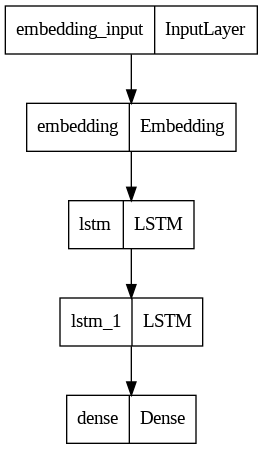

In [6]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint])


Epoch 1/50
665/665 [==============================] - ETA: 0s - loss: 7.9936 - accuracy: 0.0177
Epoch 1: loss improved from inf to 7.99360, saving model to next_words.h5
665/665 [==============================] - 18s 17ms/step - loss: 7.9936 - accuracy: 0.0177
Epoch 2/50
  1/665 [..............................] - ETA: 9s - loss: 7.7016 - accuracy: 0.0156

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


665/665 [==============================] - ETA: 0s - loss: 7.5697 - accuracy: 0.0242
Epoch 2: loss improved from 7.99360 to 7.56966, saving model to next_words.h5
665/665 [==============================] - 7s 10ms/step - loss: 7.5697 - accuracy: 0.0242
Epoch 3/50
665/665 [==============================] - ETA: 0s - loss: 7.3624 - accuracy: 0.0304
Epoch 3: loss improved from 7.56966 to 7.36238, saving model to next_words.h5
665/665 [==============================] - 7s 10ms/step - loss: 7.3624 - accuracy: 0.0304
Epoch 4/50
662/665 [============================>.] - ETA: 0s - loss: 7.1068 - accuracy: 0.0366
Epoch 4: loss improved from 7.36238 to 7.10539, saving model to next_words.h5
665/665 [==============================] - 6s 9ms/step - loss: 7.1054 - accuracy: 0.0366
Epoch 5/50
665/665 [==============================] - ETA: 0s - loss: 6.7999 - accuracy: 0.0446
Epoch 5: loss improved from 7.10539 to 6.79985, saving model to next_words.h5
665/665 [==============================] - 7s 

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def Predict_Next_Words(model, tokenizer, text, top_n=5):
    # Check if the text contains numeric values
    is_numeric = all(word.isnumeric() for word in text)

    if is_numeric:
        # Input is a sequence of indices
        text_sequence = [int(word) for word in text]
    else:
        # Input is a sequence of words
        context_words = text + [''] * (2 - len(text))
        text_sequence = tokenizer.texts_to_sequences([context_words])[0]

    sequence = pad_sequences([text_sequence], maxlen=3, padding='pre', truncating='post')[0]
    sequence = np.array(sequence)

    preds = model.predict(sequence.reshape(1, -1))
    top_preds_indices = np.argsort(preds[0])[::-1][:top_n]

    predicted_words = []

    for index in top_preds_indices:
        for key, value in tokenizer.word_index.items():
            if value == index:
                predicted_word = key
                predicted_words.append(predicted_word)
                break

    print(predicted_words)
    return predicted_words


In [9]:
while True:
    text = input("Enter your line: ")

    if text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)

            Predict_Next_Words(model, tokenizer, text, top_n=5)

        except Exception as e:
            print("Error occurred: ", e)
            continue



Enter your line: एसियाली
['एसियाली']
1/1 [==============================] - 1s 686ms/step
['सबै', 'पुलिस', 'खेलाडी', 'भने', 'वषर्ीय']
Enter your line: कतारी क्लब अल साद
['क्लब', 'अल', 'साद']
1/1 [==============================] - 0s 25ms/step
['एसियाको', 'कपको', 'त्यसैले', 'नेपाली', 'शैलीमा']
Enter your line: नेपाल सुपर लिग फुटबल
['सुपर', 'लिग', 'फुटबल']
1/1 [==============================] - 0s 18ms/step
['तेस्रो', 'पनि', 'पेनाल्टी', 'राष्ट्रिय', 'उनले']
Enter your line: पहिलो हाफमा चितवनका विमल
['हाफमा', 'चितवनका', 'विमल']
1/1 [==============================] - 0s 17ms/step
['प्रशिक्षक', 'र', 'लागि', 'राम्रो', 'केही']
Enter your line: तिमिलाइ   कस्तो 
['', 'कस्तो', '']
1/1 [==============================] - 0s 19ms/step
['सबै', 'लामाले', 'फाइनलमा', 'प्रशिक्षक', 'राम्रो']
Enter your line: 0
Execution completed.....
